# Movie Recommendations

### Recommendation Engine with LightFM

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-20m-dataset/rating.csv
/kaggle/input/movielens-20m-dataset/link.csv
/kaggle/input/movielens-20m-dataset/genome_tags.csv
/kaggle/input/movielens-20m-dataset/genome_scores.csv
/kaggle/input/movielens-20m-dataset/tag.csv
/kaggle/input/movielens-20m-dataset/movie.csv


### Loading Data set

In [3]:
movieDF = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")
movieDF.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratingDF = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")
ratingDF.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [12]:
movie = movieDF.loc[:, ["movieId", "title"]]
rating = ratingDF.loc[:, ["userId", "movieId", "rating"]]

`sample` **100,000** for the dataframe to save resources since limited **RAM size**

In [41]:
df = pd.merge(movie, rating)
df = df.sample(100_000)
df.shape

(100000, 4)

In [42]:
df.sample(10)

,movieId,title,userId,rating
8361246,1620,Kiss the Girls (1997),12184,4.0
6798121,1243,Rosencrantz and Guildenstern Are Dead (1990),135790,3.5
10714267,2424,You've Got Mail (1998),46705,3.0
13188727,3469,Inherit the Wind (1960),13753,5.0
2191107,318,"Shawshank Redemption, The (1994)",135262,5.0
2293713,339,While You Were Sleeping (1995),65583,2.0
11668170,2762,"Sixth Sense, The (1999)",108362,3.5
8429240,1644,I Know What You Did Last Summer (1997),7172,1.0
8019261,1517,Austin Powers: International Man of Mystery (1...,33559,4.0
3830434,588,Aladdin (1992),7443,4.0


In [43]:
pivotTable = df.pivot_table(index = ['userId'], columns = ["title"], values = "rating" )
pivotTable.head()

title,$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),...,Zulu (1964),[REC] (2007),[REC]² (2009),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
watched = pivotTable["Toy Story (1995)"]
sim = pivotTable.corrwith(watched)
sim = sim.sort_values(ascending = False)
sim.head()

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Toy Story (1995)                                                  1.0
Mad Max (1979)                                                    1.0
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    1.0
Broken Arrow (1996)                                               1.0
Goodfellas (1990)                                                 1.0
dtype: float64

In [45]:
watched = pivotTable["Jumanji (1995)"]
sim = pivotTable.corrwith(watched)
sim = sim.sort_values(ascending = False)
sim.head()

title
Devil's Advocate, The (1997)    1.0
Jumanji (1995)                  1.0
Mask, The (1994)                1.0
Rocky (1976)                    1.0
Me, Myself & Irene (2000)       1.0
dtype: float64

<AxesSubplot:xlabel='title'>

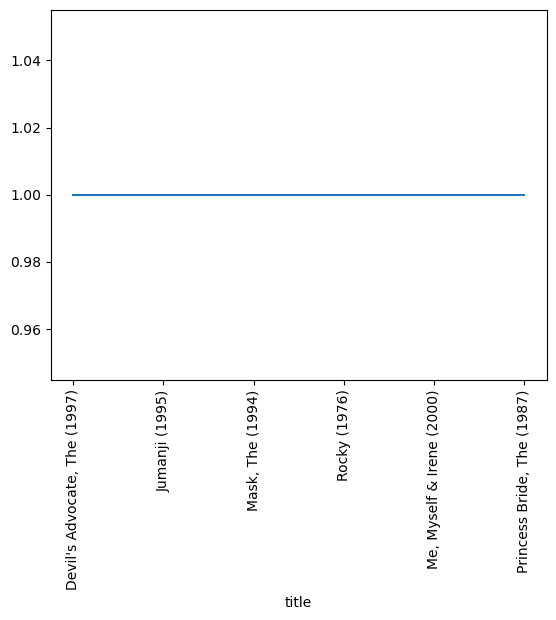

In [46]:
sim.plot(rot = 90)

In [54]:
from scipy import sparse
from lightfm import LightFM
from sklearn.metrics.pairwise import cosine_similarity 

`interactions` dataset contains ratings for movies in the **dataframe** by a user

In [47]:
interactions = df.groupby(['userId', 'movieId'])
interactions = interactions['rating'].first()
interactions.head()

userId  movieId
3       1721       4.0
        2528       4.0
4       586        4.0
7       4994       4.0
11      4343       3.0
Name: rating, dtype: float64

In [48]:
interactions = interactions.unstack()
interactions = interactions.reset_index()
interactions.head()

movieId,userId,1,2,3,4,5,6,7,8,9,...,126322,126599,126963,127861,128590,128832,128844,128950,130850,131152
0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
interactions.fillna(0, inplace = True)
interactions = interactions.set_index('userId')
interactions.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,126322,126599,126963,127861,128590,128832,128844,128950,130850,131152
userId,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
movieDict = df.title.to_dict()
df

,movieId,title,userId,rating
5538098,1040,"Secret Agent, The (1996)",70936,1.0
6583217,1221,"Godfather: Part II, The (1974)",29523,4.5
3088075,457,"Fugitive, The (1993)",32235,4.0
17605260,8965,"Polar Express, The (2004)",6465,3.0
5064278,910,Some Like It Hot (1959),41727,4.0
...,...,...,...,...
5466051,1030,Pete's Dragon (1977),23787,3.0
19223054,66503,Rally On! (Ralliraita) (2009),95694,2.0
5394173,1016,"Shaggy Dog, The (1959)",43545,3.0
91644,5,Father of the Bride Part II (1995),48056,4.5


### Model Training

In [55]:
x = sparse.csr_matrix(interactions.values)

In [56]:
model = LightFM(no_components = 50, loss = 'warp', k = 20)
model.fit(x, epochs = 50, num_threads = 4)

## Sample Recommendations

In [58]:
n_users, n_items = interactions.shape
user_x = 3

In [61]:
scores = pd.Series(model.predict(user_x, np.arange(n_items) ))
scores = list(pd.Series(scores.sort_values(ascending = False).index))

In [62]:
known = list(interactions.loc[user_x, :][interactions.loc[user_x, :] >2].index.sort_values(ascending = False) )
scores = [x for x in scores if x not in known]
scoresList = scores[0:10]

In [63]:
known = df.title.iloc[known].to_list()
recommendations = df.title.iloc[scoresList].to_list()

In [65]:
print("Known liked Titles:")
counter = 1
for i in known:
    print(str(counter) +". " +i)
    counter+=1

print("\n Recommended Items")
counter = 1
for i in recommendations:
    print(str(counter) + ". "+i)
    counter+=1

Known liked Titles:
1. Braveheart (1995)
2. Apollo 13 (1995)

 Recommended Items
1. Big Sleep, The (1946)
2. Sixth Sense, The (1999)
3. Better Than Chocolate (1999)
4. Confessions of a Dangerous Mind (2002)
5. Time Bandits (1981)
6. Perfect World, A (1993)
7. Thunderball (1965)
8. Adventures of Priscilla, Queen of the Desert, The (1994)
9. Lady and the Tramp (1955)
10. Dead Man Walking (1995)
